<a href="https://colab.research.google.com/github/pyefiuna/Laboratorio/blob/master/notebooks/1_Estad%C3%ADstica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística Descriptiva

### Por implementar
* [ ] Semana 1
  - [ ] Estadística Descriptiva
    + [x] Importar datos y explorar
    + [ ] Limpiar y rellenar datos
    + [ ] Medidas de tendencia central
    + [ ] Medidas de dispersion
    + [ ] Visualizaciones basicas
    + [ ] Ejemplo resuelto 1
    + [ ] Ejemplo resuelto 2
    + [ ] Ejemplo propuesto 1
    + [ ] Ejemplo propuesto 2   

### Importar módulos necesarios

In [1]:
import pandas as pd # módulo que sirve para trabajar con datos tabulares en Python
import numpy as np # módulo para operaciones con matrices

### Importar datos

Para los usuarios de Google Colab, es necesario tener los archivos necesarios en el Drive y, a continuación, montar el Drive.

Para ello:  
1- Correr la siguiente celda de código (ctrl + enter)  
2- Hacer clic en el link que aparece  
3- Aceptar los permisos desde la cuenta de gmail que tiene los archivos por importar  
4- Copiar el código en la celda de abajo

In [2]:
from google.colab import drive
 
drive.mount('/content/drive')

Mounted at /content/drive


Los archivos con los cuales se va a trabajar esta semana son:
* Archivo de Datos 1er Taller.csv
* Archivo de Datos.csv
* Diccionario 1er Taller.xls
* Catalago smartphones.txt
* Catalago smartphones.xlsx

Para simplicidad, las rutas de las carpetas que contienen a los archivos serán guardadas en variables llamadas EPH2016_PATH y SMARTPHONES_PATH.

In [3]:
EPH2016_PATH = '/content/drive/My Drive/LabProba/EPH2016'
SMARTPHONES_PATH = '/content/drive/My Drive/LabProba/Smartphones'

Para importar, por ejemplo, el archivo .txt de smartphones, se puede utilizar la función de pandas [read_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html)

Con una rápida inspección de este archivo, se puede ver que 

In [4]:
N = 5 # para imprimir las primeras N líneas del archivo
with open(f'{SMARTPHONES_PATH}/Catalago smartphones.txt') as smartphone: # se abre el archivo
    for i,linea in enumerate(smartphone): # i es el número de línea, linea es el texto correspondiente
      if i == N: break # se detiene la iteración cuando el contador llega a N
      print(linea) # se imprime la línea de texto correspondiente

ID PRODUCTO	ORIGEN	MARCA	PRECIO (USS)	PRECIO FINAL (USS)		Monto de referencia	1000

1	EEUU	MOTOROLA	999	999			

2	CHINA	HUAWEI	380	380			

3	CHINA	HUAWEI	972	972			

4	CHINA	ONE PLUS	471	471			



##### **Conclusión sobre la primera observación**
Se tiene 5 columnas:
* ID PRODUCTO
* ORIGEN
* MARCA
* PRECIO (USS)
* PRECIO FINAL (USS)

Además, se tiene un monto de referencia (1000 USS, según lo que se ve en la primera línea)

In [5]:
smartphones = pd.read_table(f'{SMARTPHONES_PATH}/Catalago smartphones.txt', # ruta del archivo
              usecols = ['ID PRODUCTO', 'ORIGEN', 'MARCA',
                         'PRECIO (USS)', 'PRECIO FINAL (USS)'], # columnas que se quiere importar
              index_col = 'ID PRODUCTO') # columna correspondiente al índice
smartphones.head() # se muestran las primeras 5 entradas

,ORIGEN,MARCA,PRECIO (USS),PRECIO FINAL (USS)
ID PRODUCTO,,,,
1,EEUU,MOTOROLA,999,999
2,CHINA,HUAWEI,380,380
3,CHINA,HUAWEI,972,972
4,CHINA,ONE PLUS,471,471
5,TAIWAN,HTC,569,569


#### Análisis exploratorio

Se puede empezar por descubrir la naturaleza de cada columna. Esperaríamos que las dos primeras sean categóricas (tipo string) y las columnas de precio numéricas (ya sea del tipo entero o flotante)

In [6]:
smartphones.dtypes

ORIGEN                object
MARCA                 object
PRECIO (USS)           int64
PRECIO FINAL (USS)    object
dtype: object

Las tres primeras columnas cumplen con lo esperado. La última, sin embargo, es del tipo object. Esto puede deberse a que existen valores flotantes que usa la coma como separador decimal. El tipo de esta columna puede corregirse de la siguiente forma:

In [7]:
smartphones['PRECIO FINAL (USS)'] = smartphones['PRECIO FINAL (USS)'].str.replace(',', '.').astype(float)

##### Datos categóricos

Se puede continuar explorando la cantidad de artículos provenientes de cada pais de origen. A continuación, se muestran las distribuciones por medio de gráfico de [barras](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) y de [torta](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html).

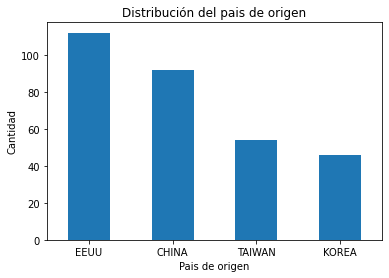

In [8]:
smartphones['ORIGEN'].value_counts().plot.bar(rot = 0,
                                              title = 'Distribución del pais de origen',
                                              xlabel = 'Pais de origen',
                                              ylabel = 'Cantidad');

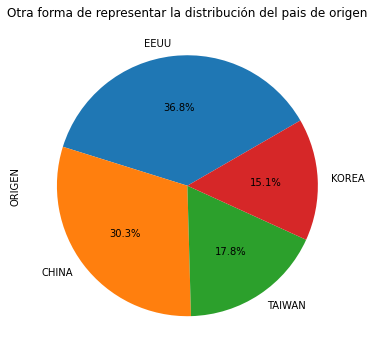

In [9]:
smartphones['ORIGEN'].value_counts().plot.pie(figsize = (6,6),
                                              startangle = 30,
                                              autopct='%1.1f%%',
                                              title = 'Otra forma de representar la\
 distribución del pais de origen');

El mismo análisis puede hacerse para la marca del producto.

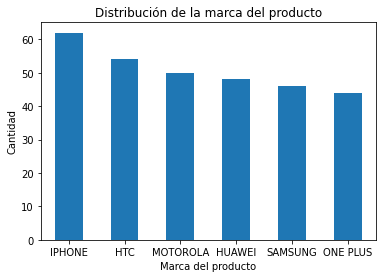

In [10]:
smartphones['MARCA'].value_counts().plot.bar(rot = 0,
                                              title = 'Distribución de la marca del producto',
                                              xlabel = 'Marca del producto',
                                              ylabel = 'Cantidad');

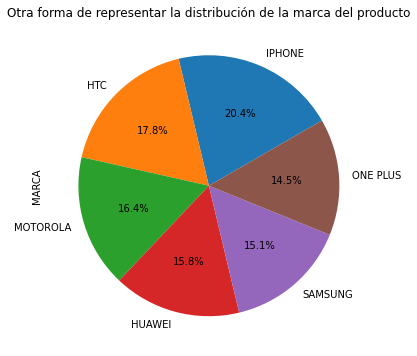

In [11]:
smartphones['MARCA'].value_counts().plot.pie(figsize = (6,6),
                                              startangle = 30,
                                              autopct='%1.1f%%',
                                              title = 'Otra forma de representar la\
 distribución de la marca del producto');

##### Datos numéricos

Para una rápida observación de los datos numéricos, puede utilizarse la función de pandas [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [12]:
smartphones.describe()

,PRECIO (USS),PRECIO FINAL (USS)
count,304.000000,304.000000
mean,783.611842,699.444737
std,386.653588,291.790572
min,108.000000,108.000000
25%,427.250000,427.250000
50%,764.500000,764.500000
75%,1108.750000,936.000000
max,1496.000000,1196.800000


La mayor parte de estos datos pueden representarse mediante un [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) (bigote de gato)

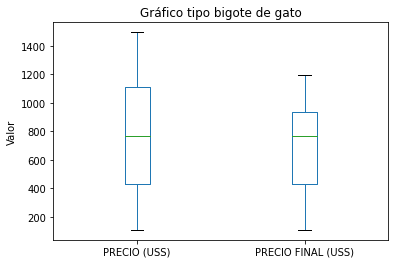

In [13]:
smartphones.plot.box(title = 'Gráfico tipo bigote de gato',
                     ylabel = 'Valor');

Para conocer de forma más detallada la distribución de estos datos numéricos, se pueden usar [histogramas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

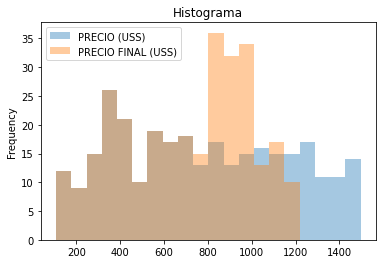

In [14]:
smartphones.plot.hist(alpha = 0.40, # transparencia
                      bins = 20, # cantidad de rectángulos por usar
                      title = 'Histograma');

### Operaciones con DataFrames

#### Item 1

Calcular el precio final estableciendo como condición los siguientes criterios:
* Si el precio es mayor a un monto de 1000USS realizar un descuento del 20%.
* Si el precio es menor a un monto de 1000USS mantener el precio original.

**OBS.:** Colocar los valores en  una nueva columna llamada **“VALOR FINAL”**.

In [15]:
smartphones['VALOR FINAL'] = smartphones['PRECIO (USS)'] # se mantiene el precio
''' a continuación, se cambian los valores de solo aquellos precious que originalmente son mayores
que 1000, por lo que se imprimirá un warning que puede ser ignorado'''
smartphones['VALOR FINAL'][smartphones['PRECIO (USS)'] > 1000 ] = smartphones['PRECIO (USS)']*(1-0.20)
smartphones['VALOR FINAL'] = smartphones['VALOR FINAL'].astype(int) # se convierte a entero
smartphones.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ORIGEN,MARCA,PRECIO (USS),PRECIO FINAL (USS),VALOR FINAL
ID PRODUCTO,,,,,
144,CHINA,HUAWEI,1024,819.2,819
52,EEUU,IPHONE,416,416.0,416
216,TAIWAN,HTC,645,645.0,645
67,KOREA,SAMSUNG,385,385.0,385
101,EEUU,MOTOROLA,781,781.0,781
152,EEUU,IPHONE,359,359.0,359
24,EEUU,IPHONE,1433,1146.4,1146
73,KOREA,SAMSUNG,1002,801.6,801
298,KOREA,SAMSUNG,1145,916.0,916


#### Ítem 2

Calcular las siguientes medidas en una tabla estadística para el **“VALOR FINAL”** (cantidad de artículos, promedio, mediana, moda, máximo, mínimo, rango, desviación estándar).

In [16]:
valor_final = smartphones['VALOR FINAL']
tabla_estadistica = pd.Series(index = ['Cantidad', 'Promedio', 'Mediana', 'Moda',
                                        'Máx.', 'Mín', 'Rango', 'Desv. Est.'],
                              data = [valor_final.count(),
                                      valor_final.mean(),
                                      valor_final.median(),
                                      *valor_final.mode().values,
                                      valor_final.max(),
                                      valor_final.min(),
                                      np.ptp(valor_final), # peak to peak, pico a pico
                                      valor_final.std()],
                              name = 'Tabla estadística').astype(int) # se convierte a entero
print(tabla_estadistica)

Cantidad       304
Promedio       699
Mediana        764
Moda           884
Máx.          1196
Mín            108
Rango         1088
Desv. Est.     291
Name: Tabla estadística, dtype: int64


#### Ítem 3
Estimar una cantidad de intervalos de clase (elegir el mayor tamaño) para la tabla de
frecuencias del valor final y agruparlas en clases del mismo tamaño.

In [17]:
n_sturges = int(1 + 3.322*np.log10(tabla_estadistica['Cantidad']))
n_brooks_carruthers = int(5*np.log10(tabla_estadistica['Cantidad']))
print(f'Por el criterio de Sturges: {n_sturges}')
print(f'Por el criterio de Brooks y Carruthers: {n_brooks_carruthers}')

Por el criterio de Sturges: 9
Por el criterio de Brooks y Carruthers: 12


Dado que se busca el intervalo más grande, se toma el sugerido por Sturges y se agrega una columna que separa en clases al valor final.

In [18]:
valor_final_clases = pd.cut(smartphones['VALOR FINAL'],
                            bins = n_sturges, # cantidad de clases
                            precision = 0) # precision: cantidad de decimales por tener en cuenta
print(valor_final_clases)

ID PRODUCTO
1      (954.0, 1075.0]
2       (350.0, 471.0]
3      (954.0, 1075.0]
4       (471.0, 592.0]
5       (471.0, 592.0]
            ...       
300     (107.0, 229.0]
301     (471.0, 592.0]
302     (712.0, 833.0]
303     (712.0, 833.0]
304     (712.0, 833.0]
Name: VALOR FINAL, Length: 304, dtype: category
Categories (9, interval[float64]): [(107.0, 229.0] < (229.0, 350.0] < (350.0, 471.0] < (471.0, 592.0] <
                                    ... < (712.0, 833.0] < (833.0, 954.0] <
                                    (954.0, 1075.0] < (1075.0, 1196.0]]


Se agrega esta columna al DataFrame de smartphones:

In [19]:
smartphones['CLASE'] = valor_final_clases
print(smartphones.head())

             ORIGEN     MARCA  ...  VALOR FINAL            CLASE
ID PRODUCTO                    ...                              
1              EEUU  MOTOROLA  ...          999  (954.0, 1075.0]
2             CHINA    HUAWEI  ...          380   (350.0, 471.0]
3             CHINA    HUAWEI  ...          972  (954.0, 1075.0]
4             CHINA  ONE PLUS  ...          471   (471.0, 592.0]
5            TAIWAN       HTC  ...          569   (471.0, 592.0]

[5 rows x 6 columns]


#### Ítem 4
Construir una tabla de frecuencias para el valor final de las marcas de cada smartphone utilizando los mismos intervalos de clase estimados en el ítem 3.

In [20]:
smartphones['CLASE'].value_counts().sort_index()
# value_counts: cuenta la cantidad de veces que aparece cada entrada de la columna CLASE
# sort_index: ordena el índicer de forma ascendente

(107.0, 229.0]      20
(229.0, 350.0]      28
(350.0, 471.0]      36
(471.0, 592.0]      28
(592.0, 712.0]      30
(712.0, 833.0]      39
(833.0, 954.0]      53
(954.0, 1075.0]     43
(1075.0, 1196.0]    27
Name: CLASE, dtype: int64

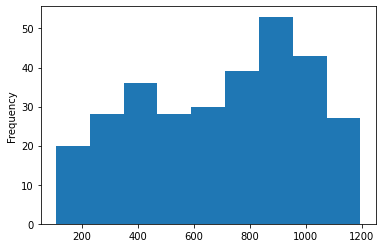

In [21]:
smartphones['VALOR FINAL'].plot.hist(bins = 9);

#### Ítem 5
Crear un histograma comparativo entre el catálogo y tu marca de smartphone en un mismo gráfico.  
**OBS.:** Visualizar en el grafico los ejes, títulos de ejes, etiqueta de datos, líneas de cuadrícula y leyenda.

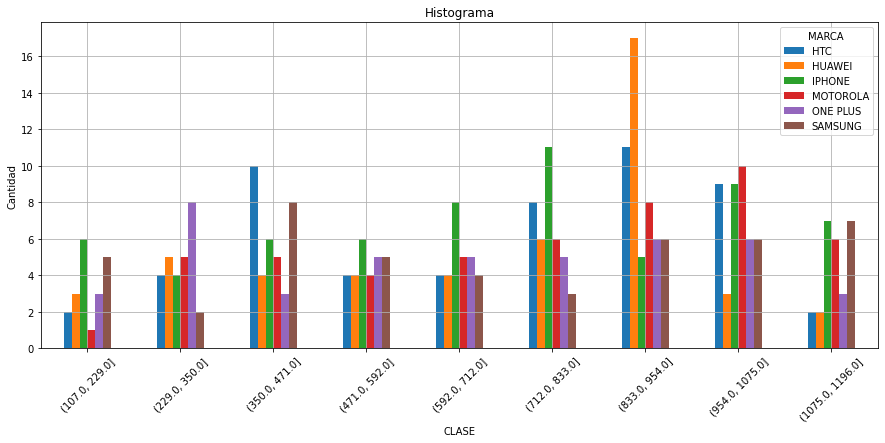

In [22]:
smartphones.groupby(['CLASE'])['MARCA'].value_counts().unstack().plot.bar(figsize = (15,6), rot = 45,
                                                                          title = 'Histograma',
                                                                          grid = True,
                                                                          ylabel = 'Cantidad');

### Segundo caso práctico

Comparar el perfil socio-económico (Ingreso per cápita mensual) de las personas que se encuentren en el rango de edades entre 25 y 60 años (inclusive), y:

**G1)** Su título más alto es de EEB (1° y 2° Ciclo) (6° grado);  
**G2)** Posee título Universitario (superior universitario) o postgrado (especialización,
maestría y doctorado).

In [26]:
## Se importa el .csv necesario
EPH = pd.read_csv(f'{EPH2016_PATH}/Archivo de Datos.csv')
print(EPH)

      Departamento de residencia  ... Deciles para cada área
0                           DPTO  ...                decilai
1                            NaN  ...                     10
2                            NaN  ...                     10
3                            NaN  ...                     10
4                            NaN  ...                     10
...                          ...  ...                    ...
37810                         15  ...                     10
37811                         15  ...                      7
37812                         15  ...                      7
37813                         15  ...                      7
37814                         15  ...                      7

[37815 rows x 58 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
## La primera columna fila debe ser eliminada, ya que no aporta información útil
EPH.drop(index = 0, inplace = True)
print(EPH)

      Departamento de residencia  ... Deciles para cada área
1                            NaN  ...                     10
2                            NaN  ...                     10
3                            NaN  ...                     10
4                            NaN  ...                     10
5                            NaN  ...                     10
...                          ...  ...                    ...
37810                         15  ...                     10
37811                         15  ...                      7
37812                         15  ...                      7
37813                         15  ...                      7
37814                         15  ...                      7

[37814 rows x 58 columns]


In [32]:
print("Las columnas del DataFrame son:")
for i,columna in enumerate(EPH.columns): print(i, columna)

Las columnas del DataFrame son:
0 Departamento de residencia
1 AREA de Residencia
2 Edad
3 Sexo
4 Año de nacimiento
5 Estado civil
6 Ingreso mensual Ocupación Principal declarado
7 Ingreso mensual Ocupación Secundaria declarado
8 Ingreso mensual Otras Ocupaciones declarado
9 Ingreso mensual Alquileres o Rentas neto declarado
10 Ingreso mensual Intereses, Dividendos o Utilidades declarado
11 Ingreso mensual Ayuda Familiar del país declarado
12 Ingreso mensual Prestaciones por divorcio O cuidado de hijos declarado
13 Ingreso mensual Jubilación declarado
14 Ingresos del Estado (Monetario: Tekopora) declarado
15 Ingreso mensual Pensión declarado
16 Ingresos del Estado (Monetario: Adulto Mayor) declarado
17 Ingresos por Víveres de alguna institución pública
18 Otros ingresos mensuales declarado
19 Idioma que habla en la casa la mayor parte del tiempo
20 ¿Sabe leer y escibir?
21 Asiste o asistió a una institución de ens. educativa
22 Nivel y grado aprobado
23 Título o diploma que obtuvo
24 A

Las columnas relevantes son:  
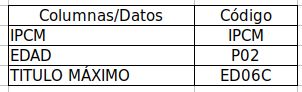

In [44]:
# Se filtra para tener las columnas relevantes
EPH = EPH[['Ingreso percapita mensual', 'Edad', 'Título o diploma que obtuvo']]
EPH.head(10)

,Ingreso percapita mensual,Edad,Título o diploma que obtuvo
2,5578541.667,64,NaN
3,5578541.667,45,1
4,5578541.667,36,1
6,7250000,65,1
7,5937500,35,14
8,5937500,34,1
12,994000,61,NaN
13,994000,44,NaN
14,994000,38,NaN
15,994000,36,NaN


#### Tabla de estadística descriptiva

In [41]:
# Se filtra para obtener solo aquellos entre 25 y 60 años
EPH.dropna(subset = ['Edad'], inplace = True) # se elimina a aquellos que no tienen su edad registrada
EPH['Edad'] = EPH['Edad'].astype(int) # se convierten las edades a enteros
EPH = EPH[EPH['Edad'].between(25,60)]
print(EPH.head())

  Departamento de residencia  ... Deciles para cada área
2                        NaN  ...                     10
3                        NaN  ...                     10
4                        NaN  ...                     10
6                        NaN  ...                     10
7                        NaN  ...                     10

[5 rows x 58 columns]


Para hacer la distinción entre grupo 1 y 2 debe tomarse en cuenta el siguiente criterio para la columna Título Máximo:
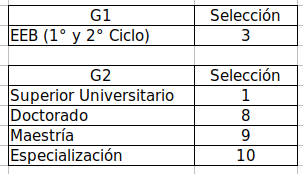

In [55]:
EPH.dropna(subset = ['Título o diploma que obtuvo'], inplace = True) # se elimina los que no consiguieron títulos
EPH['Título o diploma que obtuvo'] = EPH['Título o diploma que obtuvo'].astype(int) # es necesario pasar a int
G1 = EPH[EPH['Título o diploma que obtuvo'] == 3]
G2 = EPH[EPH['Título o diploma que obtuvo'].between(8,10)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


G1    1393000.0
G2    7500000.0
dtype: float64

In [151]:
G1_IPCM = G1['Ingreso percapita mensual'].rename('G1').astype(float)
G2_IPCM = G2['Ingreso percapita mensual'].rename('G2').astype(float)
G_IPCMs = pd.concat([G1_IPCM, G2_IPCM], axis = 1)
tabla_estadistica = pd.DataFrame(index = ['Cantidad', 'Media', 'Máximo', 'Mínimo',
                                        'Rango.', 'Moda', 'Mediana', 'Desv. Est.'],
                              data = [G_IPCMs.count(),
                                      G_IPCMs.mean(),
                                      G_IPCMs.max(),
                                      G_IPCMs.min(),
                                      pd.Series(index = ['G1','G2'],
                                                data = [np.ptp(G_IPCMs.G1.dropna()),
                                                 np.ptp(G_IPCMs.G2.dropna())]), # peak to peak, pico a pico
                                      pd.Series(index = ['G1','G2'],
                                                data = G_IPCMs.round(-3).mode().values[0]), # se redondea con precisión en los miles para que la moda tenga más sentido
                                      G_IPCMs.median(),
                                      G_IPCMs.std()]) # se convierte a entero
print(tabla_estadistica.astype(int)) # Se imprime la tabla con números enteros

                  G1        G2
Cantidad         309        86
Media        1909075   4848239
Máximo      16507746  25000000
Mínimo        192386    644963
Rango.      16315360  24355036
Moda         1393000   7500000
Mediana      1533413   3669074
Desv. Est.   1584358   4306701


#### Tabla de Frecuencias

In [176]:
SAL_MIN = 2192839
intervalos = pd.interval_range(start=0,
                               end=G_IPCMs.max().max()+SAL_MIN,
                               freq=SAL_MIN,
                               closed='left')
print("Los intervalos son:")
for inter in intervalos: print(inter)

Los intervalos son:
[0.0, 2192839.0)
[2192839.0, 4385678.0)
[4385678.0, 6578517.0)
[6578517.0, 8771356.0)
[8771356.0, 10964195.0)
[10964195.0, 13157034.0)
[13157034.0, 15349873.0)
[15349873.0, 17542712.0)
[17542712.0, 19735551.0)
[19735551.0, 21928390.0)
[21928390.0, 24121229.0)
[24121229.0, 26314068.0)


In [177]:
G1

,Ingreso percapita mensual,Edad,Título o diploma que obtuvo,clase
260,1004810.75,38,3,"[0.0, 2192839.0)"
269,1684000,41,3,"[0.0, 2192839.0)"
1145,347151.4025,37,3,"[0.0, 2192839.0)"
1250,1527848.6,37,3,"[0.0, 2192839.0)"
1417,5348788.912,53,3,"[4385678.0, 6578517.0)"
...,...,...,...,...
37270,1.20752e+06,38,3,"[0.0, 2192839.0)"
37286,1.25944e+06,36,3,"[0.0, 2192839.0)"
37373,1.89433e+06,55,3,"[0.0, 2192839.0)"
37492,907122,34,3,"[0.0, 2192839.0)"


260            [0.0, 2192839.0)
269            [0.0, 2192839.0)
1145           [0.0, 2192839.0)
1250           [0.0, 2192839.0)
1417     [4385678.0, 6578517.0)
                  ...          
37270          [0.0, 2192839.0)
37286          [0.0, 2192839.0)
37373          [0.0, 2192839.0)
37492          [0.0, 2192839.0)
37623          [0.0, 2192839.0)
Name: Ingreso percapita mensual, Length: 309, dtype: category
Categories (12, interval[float64]): [[0.0, 2192839.0) < [2192839.0, 4385678.0) <
                                     [4385678.0, 6578517.0) < [6578517.0, 8771356.0) < ... <
                                     [17542712.0, 19735551.0) < [19735551.0, 21928390.0) <
                                     [21928390.0, 24121229.0) < [24121229.0, 26314068.0)]

In [186]:
G1_IPCM['clase'] = pd.cut(G1['Ingreso percapita mensual'].astype(float), bins = intervalos).rename('G1')
G2_IPCM['clase'] = pd.cut(G2['Ingreso percapita mensual'].astype(float), bins = intervalos).rename('G2')
G = pd.concat([G1_IPCM['clase'], G2_IPCM['clase']], axis = 1)
G.value_counts()

Series([], dtype: int64)

In [196]:
G.apply(pd.Series.value_counts, axis = 0)

,G1,G2
"[0.0, 2192839.0)",223,25
"[2192839.0, 4385678.0)",70,27
"[4385678.0, 6578517.0)",12,15
"[6578517.0, 8771356.0)",1,10
"[8771356.0, 10964195.0)",1,2
"[10964195.0, 13157034.0)",0,1
"[13157034.0, 15349873.0)",1,4
"[15349873.0, 17542712.0)",1,0
"[17542712.0, 19735551.0)",0,0
"[19735551.0, 21928390.0)",0,1


#### Histogramas

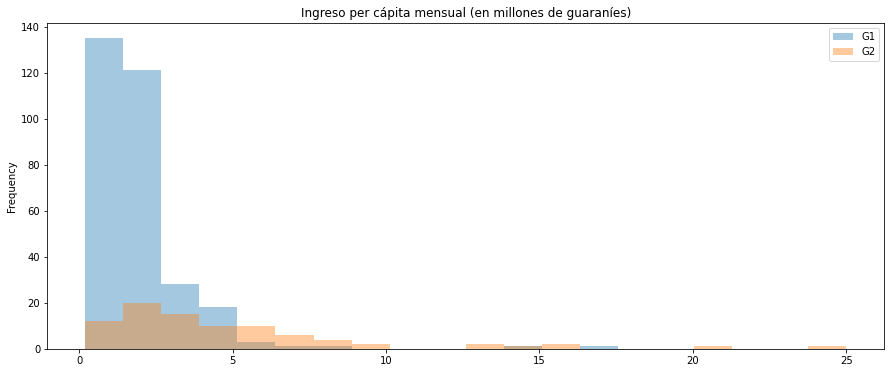

In [218]:
(G_IPCMs/1e6).plot.hist(bins = 20,
                  figsize = (15,6),
                  alpha = 0.4,
                  title = 'Ingreso per cápita mensual (en millones de guaraníes)');